# Simple linear regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Load the data

In [12]:
# Load the data from 12TH SGPA.csv in the same folder
data = pd.read_csv('12TH SGPA.csv')

In [13]:
# Let's check what's inside this data frame
# This data consist of 2 columns: Independent variable Marks_obtained (students marks of 12th examination)
# second one is dependent variable SGPA obtained in Semester 1 of Engineering
data

,MARKS_OBTAINED,SGPA
0,392,8.50
1,467,7.96
2,394,8.76
3,393,9.46
4,341,8.60
...,...,...
924,2224,8.42
925,2269,7.97
926,2286,8.39
927,576,5.33


In [14]:
# This method gives us very nice descriptive statistics. 
data.describe()

,MARKS_OBTAINED,SGPA
count,929.000000,929.000000
mean,448.411195,7.941841
std,225.550860,1.186460
min,0.000000,0.640000
25%,382.000000,7.480000
50%,415.000000,8.220000
75%,459.000000,8.740000
max,2487.000000,9.830000


# Create your first regression

## Define the dependent and the independent variables

In [15]:
# Following the regression equation, our dependent variable (y) is the SGPA
y = data ['SGPA']
# Similarly, our independent variable (x) is the MARKS_OBTAINED in 12th Exam
x1 = data ['MARKS_OBTAINED']

## Explore the data

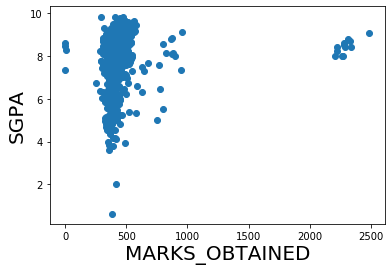

In [18]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1,y)
# Name the axes
plt.xlabel('MARKS_OBTAINED', fontsize = 20)
plt.ylabel('SGPA', fontsize = 20)
# Show the plot
plt.show()

## Regression itself

In [19]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SGPA   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     13.00
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           0.000329
Time:                        10:25:05   Log-Likelihood:                -1470.1
No. Observations:                 929   AIC:                             2944.
Df Residuals:                     927   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6645      0.086     89.009      0.000       7.496       7.833
MARKS_OBTAINED     0.0006      0.000      3.605      0.000       0.000       0.001
==============================================================================
Omnibus:                      263.738   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              680.613
Skew:                          -1.474   Prob(JB):                    1.61e-148
Kurtosis:                       5.983   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

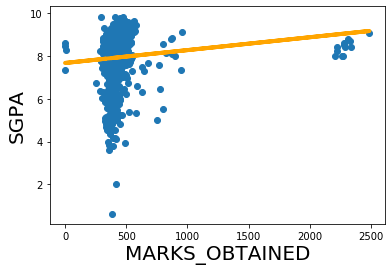

In [20]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 0.0006*x1 + 7.6645
# Plot the regression line against the independent variable (12th marks)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('MARKS_OBTAINED', fontsize = 20)
plt.ylabel('SGPA', fontsize = 20)
plt.show()

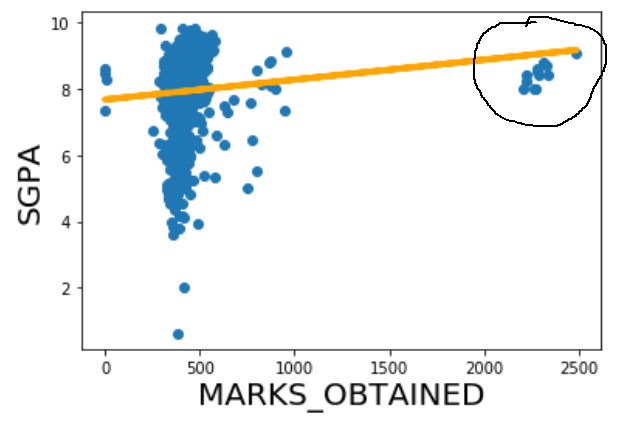

In [21]:
from IPython.display import Image
Image(filename='outlier.png')

As we can see above, there are few students for whom 12th obtained marks are above the range of 1000.
This is an outliers and hence can be removed from the dataset

Outlier detection - Tukey IQR
Identifies extreme values in data
Outliers are defined as:
Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)

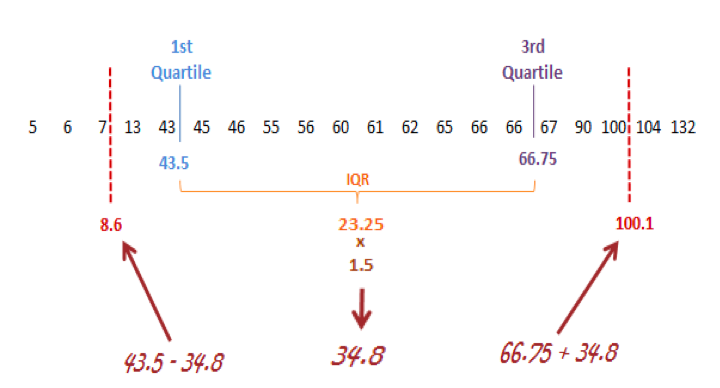

In [22]:
from IPython.display import Image
Image(filename='tukeyiqr.jpg')
# Imagine taken from: 
# http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/

In our Example of 12th marks and SGPA, following are the observations

First Quartile Q1 = 382
Third Quartile Q3 = 459
(Q3-Q1) = 459 - 382 = 77
1.5 * (Q3-Q1) = 1.5 * 77 = 115.5
So outliers are below = Q1 - 115.5 = 382 - 115.5 = 266.5
and outliers are above = Q3 + 115.5 = 459 + 115.5 = 574.5

We need to remove all those records whose 12th obtained marks are below 266.5 and above 574.5

In [23]:
# Load the data from 12TH SGPA - outlier remove.csv in the same folder 
# all records where obtained marks below 266.5 and above 574.5 are removed
data2 = pd.read_csv('12TH SGPA - outlier remove.csv')

In [25]:
# Following the regression equation, our dependent variable (y) is the SGPA
y = data2 ['SGPA']
# Similarly, our independent variable (x) is the MARKS_OBTAINED in 12th Exam
x1 = data2 ['MARKS_OBTAINED']

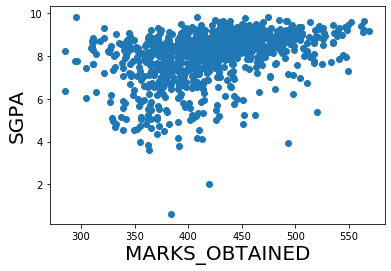

In [26]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1,y)
# Name the axes
plt.xlabel('MARKS_OBTAINED', fontsize = 20)
plt.ylabel('SGPA', fontsize = 20)
# Show the plot
plt.show()

In [27]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SGPA   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     140.0
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           4.23e-30
Time:                        11:19:25   Log-Likelihood:                -1356.3
No. Observations:                 892   AIC:                             2717.
Df Residuals:                     890   BIC:                             2726.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4289      0.300     14.784      0.000       3.841       5.017
MARKS_OBTAINED     0.0084      0.001     11.831      0.000       0.007       0.010
==============================================================================
Omnibus:                      268.848   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              820.471
Skew:                          -1.483   Prob(JB):                    6.87e-179
Kurtosis:                       6.644   Cond. No.                     3.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

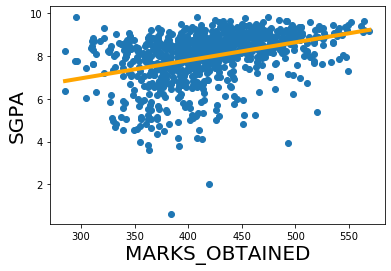

In [28]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 0.0084*x1 + 4.4289
# Plot the regression line against the independent variable (12th marks)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('MARKS_OBTAINED', fontsize = 20)
plt.ylabel('SGPA', fontsize = 20)
plt.show()

Equation on line before outlier detection is yhat = 0.0006*x1 + 7.6645

Equation on line before outlier detection is yhat = 0.0084*x1 + 4.4289